# I - Exploration et analyse de la donnée (données en fonction des années)

## Imports

In [1]:
import gdown
import zipfile

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
DATA_DIR = '../data/'
DATA_RAW_DIR = DATA_DIR + 'raw/'

# I- Récupération et analyse des données

Nous avons tenté de récupérer des données à l'aide de l'API spotify de python : Spotipy. Malheuresement, cette opération prend trop de temps. Ainsi nous allons pour le moment nous contenter de deux bases de données différentes : une de 586672 chansons avec des informations sur l'année de sortie de la musique, et une de 232725 chansons avec des informations sur le genre de la musique. On émet l'hypothèse selon laquelle connaître le genre d'une musique nous aidera à mieux prédire la popularité d'une musique. On commencera ainsi par se concentrer sur la deuxième base de données.

In [3]:
# tracks_zip = DATA_RAW_DIR+'tracks.zip'
# url = "https://drive.google.com/uc?id=1YWT13amw-IruFmhIT-ahhQR6sbD0Y26J"

# # Download from gdrive
# gdown.download(url, tracks_zip, quiet=False)

# # Unzip file
# with zipfile.ZipFile(tracks_zip, 'r') as zip_ref:
#     zip_ref.extractall(DATA_RAW_DIR)

Downloading...
From: https://drive.google.com/uc?id=1YWT13amw-IruFmhIT-ahhQR6sbD0Y26J
To: c:\Users\louis\Documents\_TELECOM PARIS\GitHub\Exploration-Big-Data\Spotify\data\raw\tracks.zip
100%|██████████| 49.9M/49.9M [00:00<00:00, 95.3MB/s]


In [4]:
tracks_csv = DATA_RAW_DIR+'tracks.csv'

data_annee = pd.read_csv(tracks_csv)
print("La taille totale de notre base de données est de ",data_annee.shape)
data_annee.head()

La taille totale de notre base de données est de  (586672, 20)


,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [5]:
pd.isnull(data_annee).sum()

id                   0
name                71
popularity           0
duration_ms          0
explicit             0
artists              0
id_artists           0
release_date         0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
time_signature       0
dtype: int64

In [6]:
data_annee.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
popularity,586672.0,27.570053,18.370642,0.0,13.0000,27.000000,41.00000,100.000
duration_ms,586672.0,230051.167286,126526.087418,3344.0,175093.0000,214893.000000,263867.00000,5621218.000
explicit,586672.0,0.044086,0.205286,0.0,0.0000,0.000000,0.00000,1.000
danceability,586672.0,0.563594,0.166103,0.0,0.4530,0.577000,0.68600,0.991
energy,586672.0,0.542036,0.251923,0.0,0.3430,0.549000,0.74800,1.000
key,586672.0,5.221603,3.519423,0.0,2.0000,5.000000,8.00000,11.000
loudness,586672.0,-10.206067,5.089328,-60.0,-12.8910,-9.243000,-6.48200,5.376
mode,586672.0,0.658797,0.474114,0.0,0.0000,1.000000,1.00000,1.000
speechiness,586672.0,0.104864,0.179893,0.0,0.0340,0.044300,0.07630,0.971
acousticness,586672.0,0.449863,0.348837,0.0,0.0969,0.422000,0.78500,0.996


Tranformons notre index en date afin de classer les musiques par année.

In [7]:
data_annee.set_index("release_date", inplace = True)
data_annee.index=pd.to_datetime(data_annee.index)
data_annee.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
release_date,,,,,,,,,,,,,,,,,,,
1922-02-22,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1922-06-01,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
1922-03-21,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
1922-03-21,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
1922-01-01,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


C:\Users\louis\AppData\Local\Temp\ipykernel_60412\2570086511.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr(method = method)


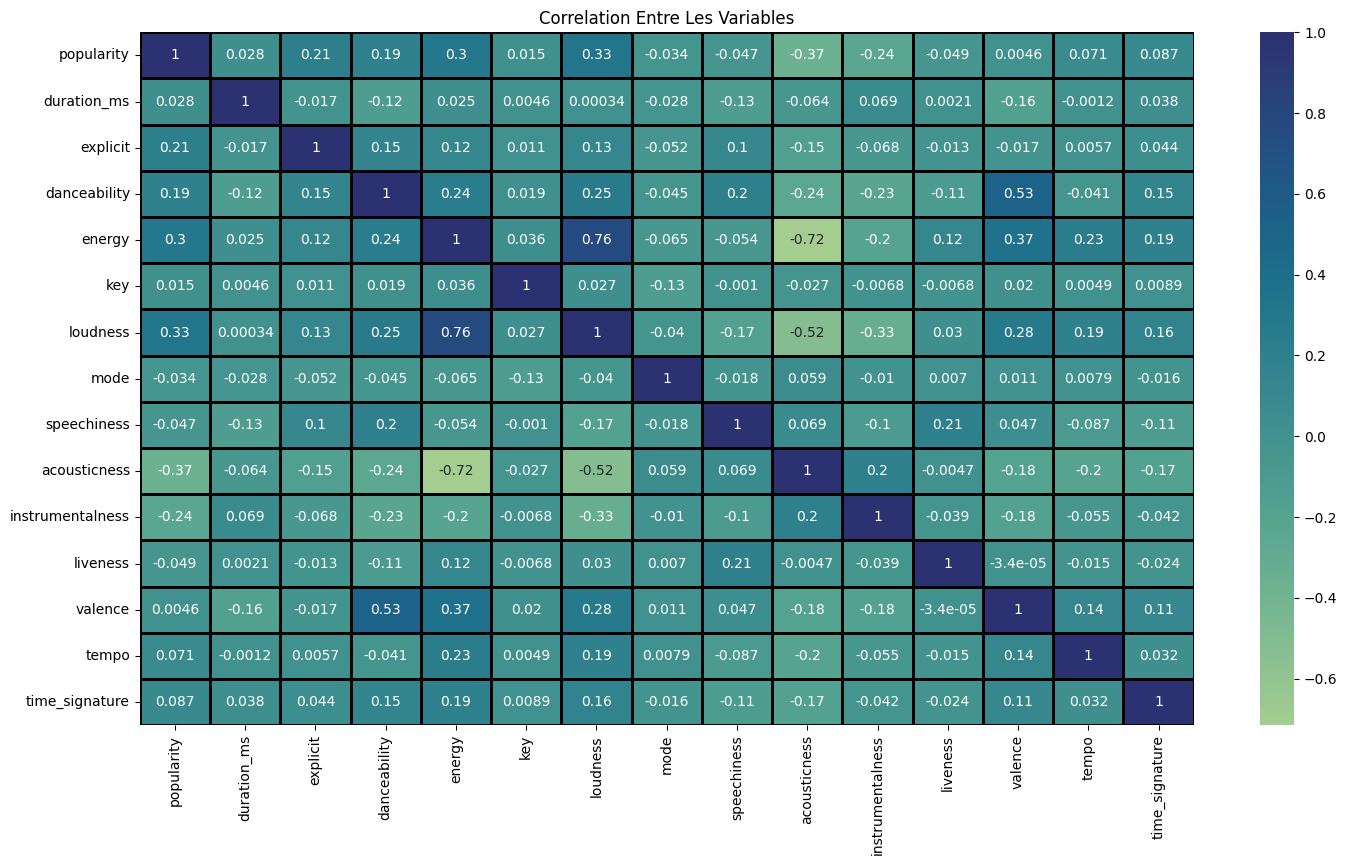

In [8]:
def table_de_corrélation(df,method):
    correlation = df.corr(method = method)
    plt.figure(figsize=(17,9))
    map_correlation = sns.heatmap(correlation,annot=True,cmap="crest",linewidths=2,linecolor="Black")
    map_correlation.set_title("Correlation Entre Les Variables")

    
table_de_corrélation(data_annee,"pearson")
    
    

Comme nous l'avons précisé, ce jeu de données sera probablement utilisé par la suite ci notre hypothèse n'est pas valide, et que l'année de sortie d'une musique nous aide mieux à prédire la popularité que le genre de cette dernière. Nous allons donc tracer les différentes évolutions de la musique en fonction des années et ne pas s'intéresser pour le moment aux corrélations des features.

Transformons ainsi le format de realease date afin qu'il soit utilisable 

In [9]:
data_annee['dates']=data_annee.index.get_level_values('release_date')
data_annee.dates=pd.to_datetime(data_annee.dates)
annee = data_annee.dates.dt.year

In [10]:
def courbe_feature_annee(feature):
    sns.set_style(style = "darkgrid")
    fig, ax = plt.subplots(figsize=(15,7))
    fig = sns.lineplot(x = annee, y = data_annee[feature],ax=ax).set(title=feature + " en fonction des années")

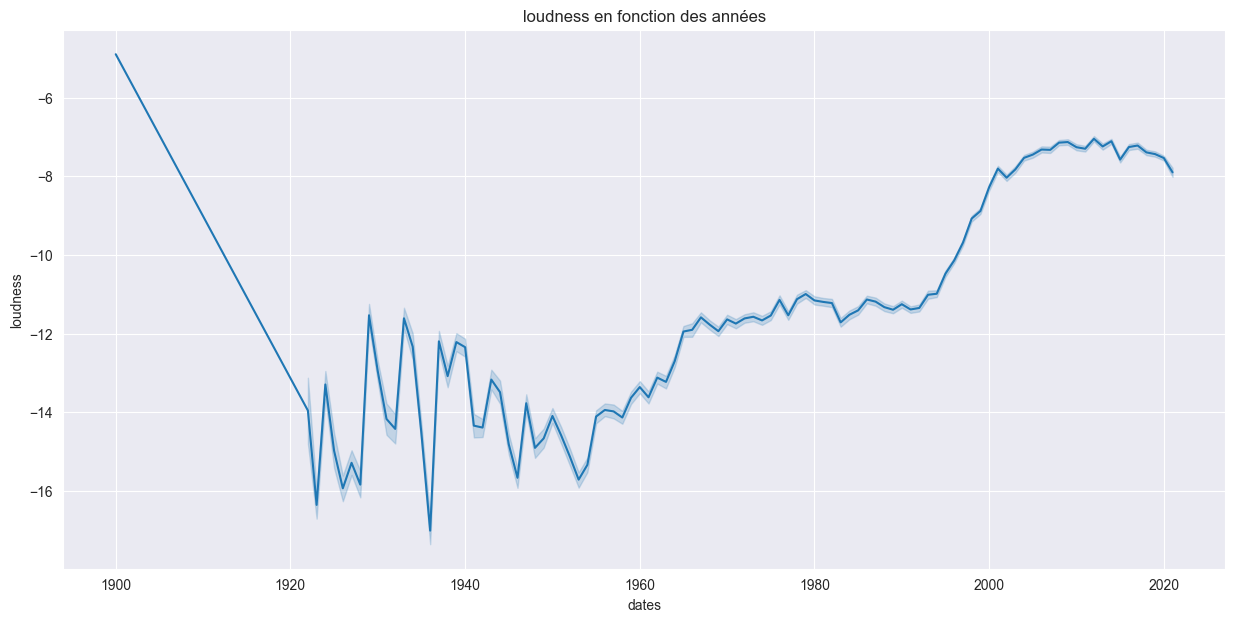

In [11]:
courbe_feature_annee("loudness")

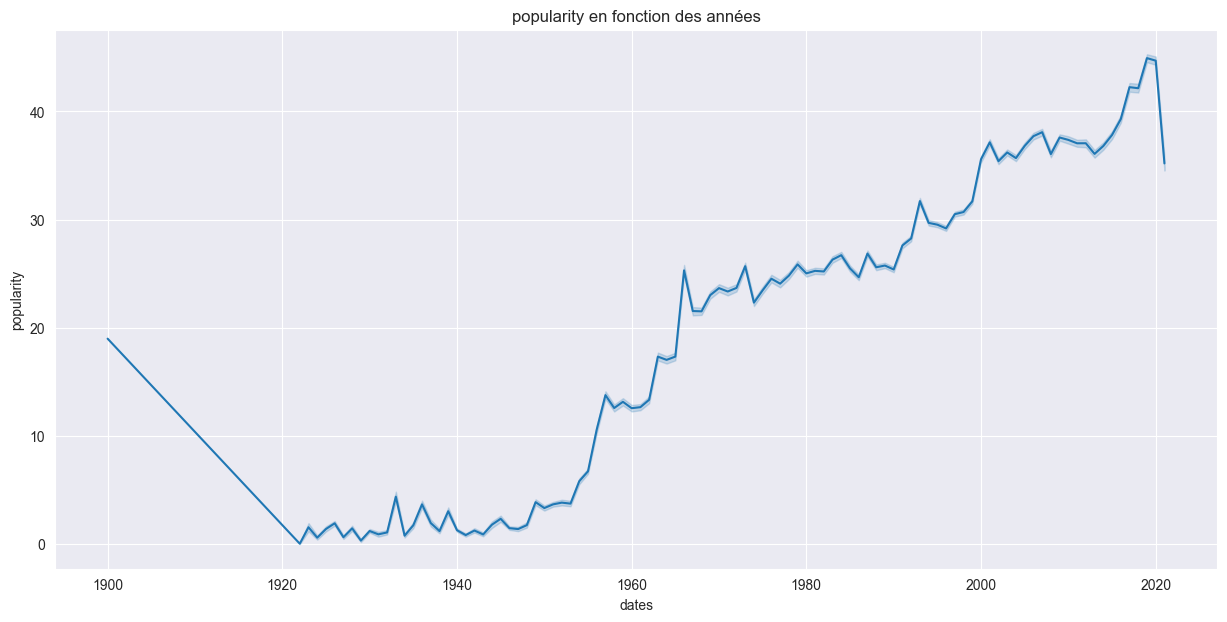

In [12]:
courbe_feature_annee("popularity")

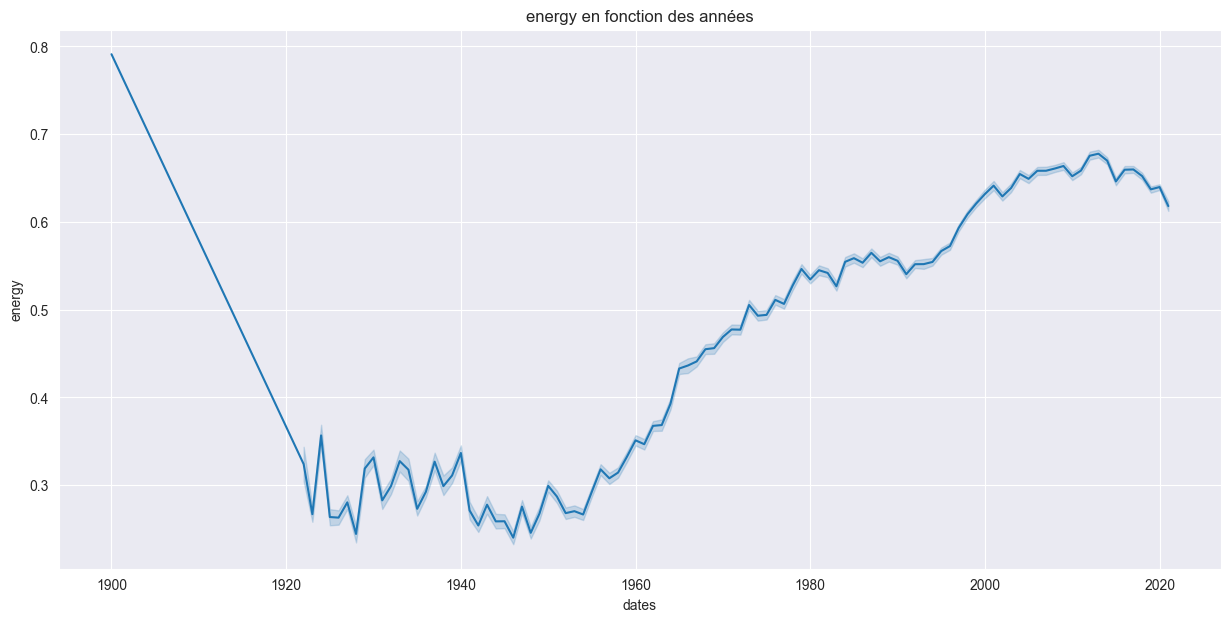

In [13]:
courbe_feature_annee("energy")

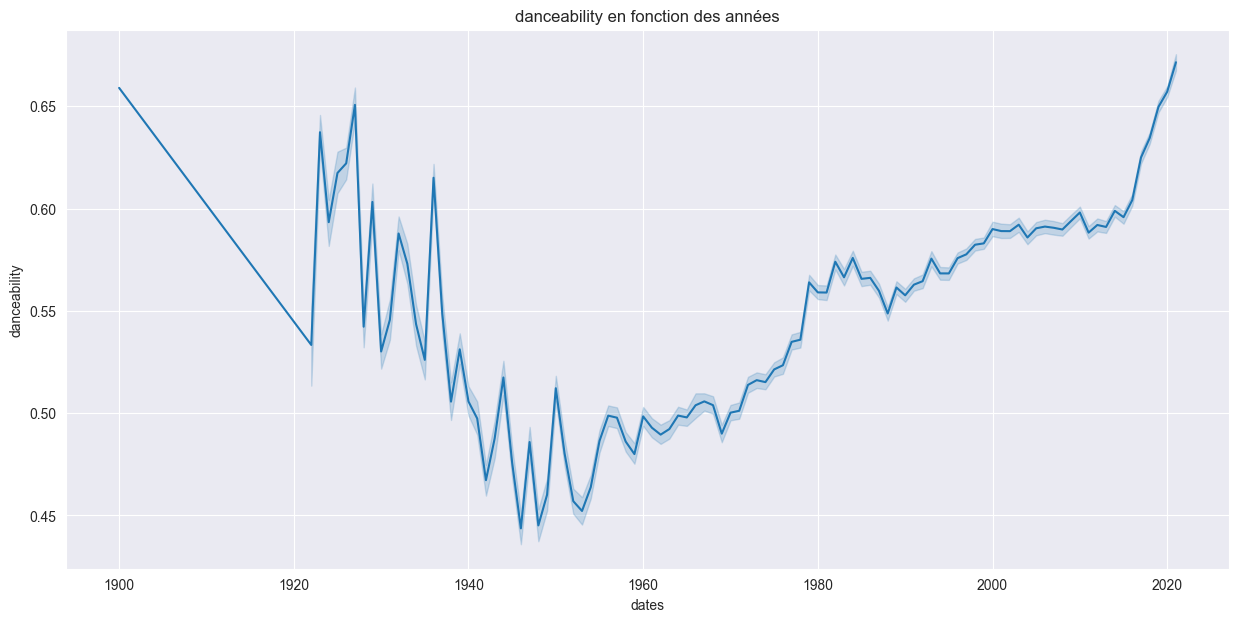

In [14]:
courbe_feature_annee("danceability")

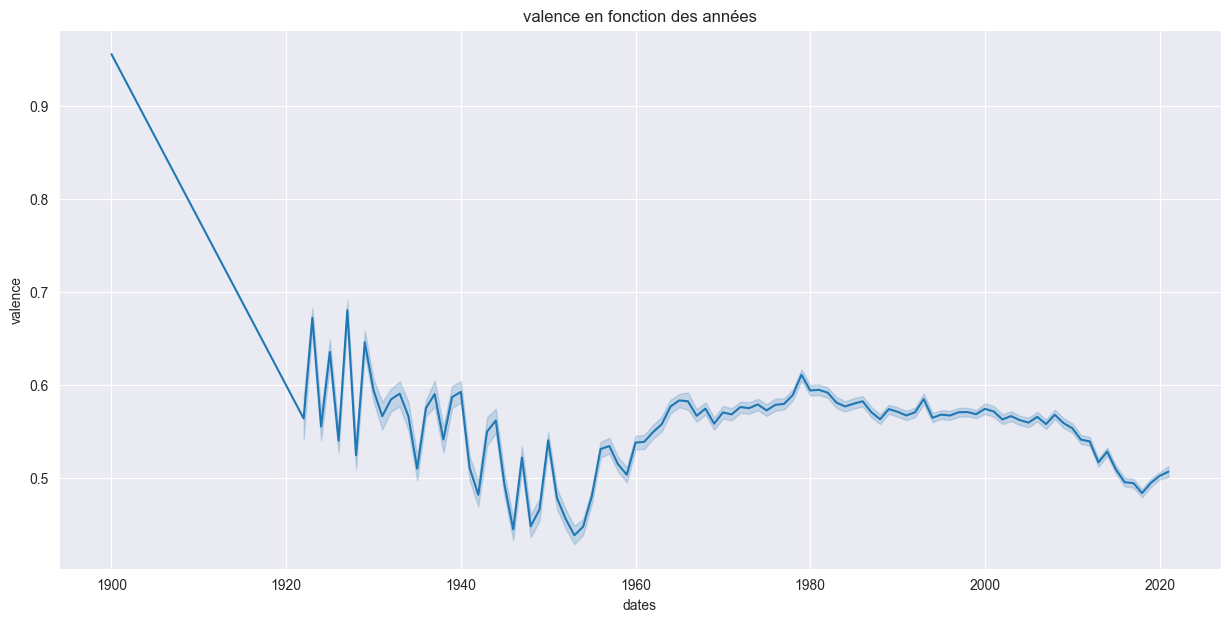

In [15]:
courbe_feature_annee("valence")

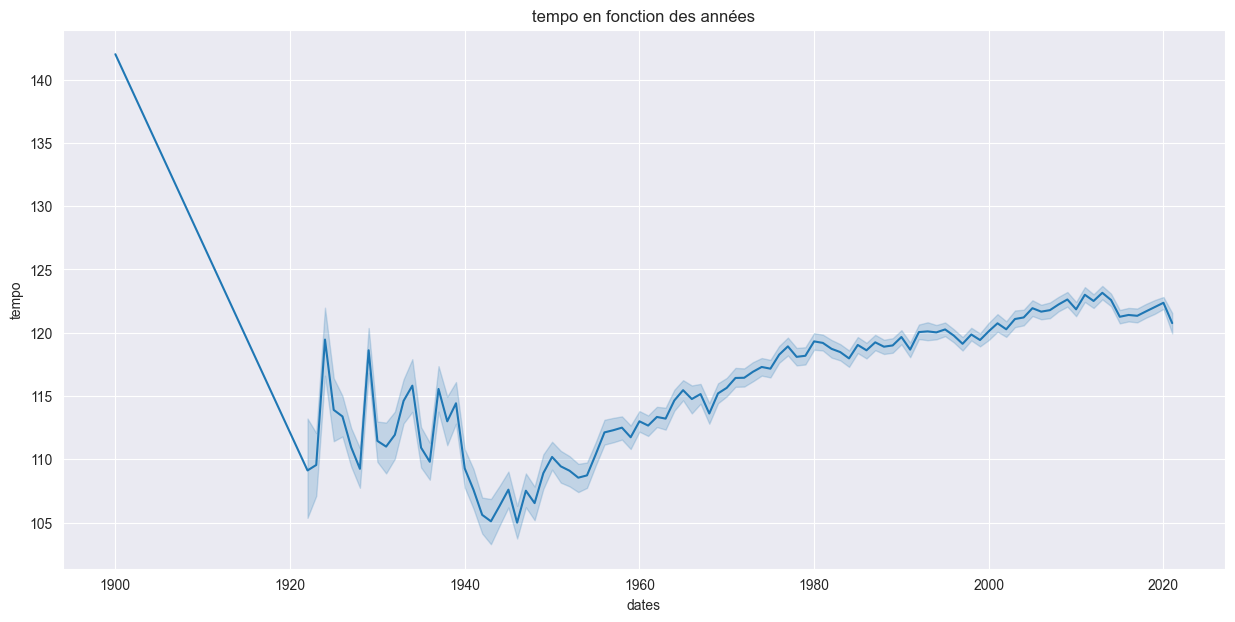

In [16]:
courbe_feature_annee("tempo")